# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [5]:
# Mapear sexo para rótulos legíveis
df['sexo_label'] = df['sex'].map({1: 'Homem', 0: 'Mulher'})

# Conferir contagem
df['sexo_label'].value_counts()

sexo_label
Homem     206
Mulher     97
Name: count, dtype: int64

In [13]:
# Criar tabela cruzada
tab = pd.crosstab(df['sexo_label'], df['flag_doente'])
tab.columns = ['Saudáveis', 'Doentes']
tab['Total'] = tab.sum(axis=1)
tab

,Saudáveis,Doentes,Total
sexo_label,,,
Homem,92,114,206
Mulher,72,25,97


In [14]:
tab['Taxa_Doentes'] = tab['Doentes'] / tab['Total']
tab

,Saudáveis,Doentes,Total,Taxa_Doentes
sexo_label,,,,
Homem,92,114,206,0.553398
Mulher,72,25,97,0.257732


In [15]:
tab['Odds'] = tab['Doentes'] / tab['Saudáveis']
tab

,Saudáveis,Doentes,Total,Taxa_Doentes,Odds
sexo_label,,,,,
Homem,92,114,206,0.553398,1.239130
Mulher,72,25,97,0.257732,0.347222


In [16]:
# Odds total
odds_total = df['flag_doente'].sum() / (len(df) - df['flag_doente'].sum())

# Calcular o Odds Ratio
tab['Odds_Ratio'] = tab['Odds'] / odds_total
tab

,Saudáveis,Doentes,Total,Taxa_Doentes,Odds,Odds_Ratio
sexo_label,,,,,,
Homem,92,114,206,0.553398,1.239130,1.461996
Mulher,72,25,97,0.257732,0.347222,0.409672


In [17]:
tab['Logito'] = np.log(tab['Odds'])
tab['WOE'] = np.log(tab['Odds_Ratio'])
tab

,Saudáveis,Doentes,Total,Taxa_Doentes,Odds,Odds_Ratio,Logito,WOE
sexo_label,,,,,,,,
Homem,92,114,206,0.553398,1.239130,1.461996,0.21441,0.379802
Mulher,72,25,97,0.257732,0.347222,0.409672,-1.05779,-0.892398


C:\Users\brunn\AppData\Local\Temp\ipykernel_16228\4190301351.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


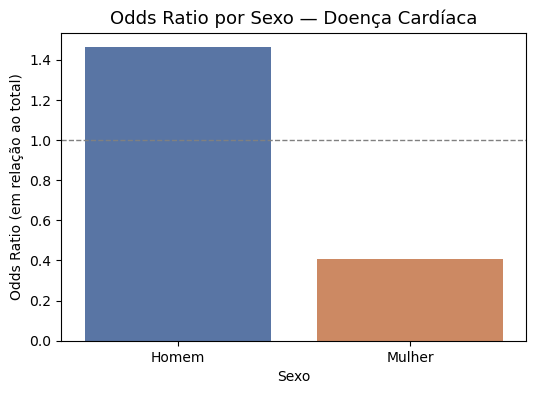

In [18]:
# 📊 Visualização — Odds Ratio por Sexo
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.barplot(
    x=tab.index,
    y=tab['Odds_Ratio'],
    palette=['#4C72B0', '#DD8452']
)

plt.title('Odds Ratio por Sexo — Doença Cardíaca', fontsize=13)
plt.ylabel('Odds Ratio (em relação ao total)')
plt.xlabel('Sexo')
plt.axhline(1, color='gray', linestyle='--', linewidth=1)  # linha de referência
plt.show()

2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [20]:
# Categorizar a variável age em 5 grupos
df['faixa_idade'] = pd.qcut(df['age'], 5, labels=['Muito jovem', 'Jovem', 'Meia-idade', 'Idoso', 'Muito idoso'])

# Verificar a distribuição
df['faixa_idade'].value_counts()

faixa_idade
Meia-idade     71
Jovem          64
Muito jovem    63
Muito idoso    60
Idoso          45
Name: count, dtype: int64

In [21]:
# Criar a tabela bivariada
tab_age = pd.crosstab(df['faixa_idade'], df['flag_doente'])
tab_age.columns = ['Saudáveis', 'Doentes']
tab_age['Total'] = tab_age.sum(axis=1)

In [23]:
# Calcular taxa de doença e idade média por faixa (corrigido)
tab_age['Taxa_Doentes'] = tab_age['Doentes'] / tab_age['Total']
tab_age['Idade_Média'] = df.groupby('faixa_idade', observed=False)['age'].mean().round(1)

In [24]:
# Calcular Odds e Odds Ratio (usando total como referência)
tab_age['Odds'] = tab_age['Doentes'] / tab_age['Saudáveis']
odds_total = df['flag_doente'].sum() / (len(df) - df['flag_doente'].sum())
tab_age['Odds_Ratio'] = tab_age['Odds'] / odds_total

In [25]:
# Calcular Logito e WOE
tab_age['Logito'] = np.log(tab_age['Odds'])
tab_age['WOE'] = np.log(tab_age['Odds_Ratio'])

In [26]:
# Exibir resultado final ordenado
tab_age = tab_age[['Saudáveis', 'Doentes', 'Total', 'Idade_Média', 'Taxa_Doentes', 'Odds', 'Odds_Ratio', 'Logito', 'WOE']]
tab_age

,Saudáveis,Doentes,Total,Idade_Média,Taxa_Doentes,Odds,Odds_Ratio,Logito,WOE
faixa_idade,,,,,,,,,
Muito jovem,47,16,63,41.2,0.253968,0.340426,0.401653,-1.077559,-0.912166
Jovem,42,22,64,50.0,0.343750,0.523810,0.618020,-0.646627,-0.481235
Meia-idade,32,39,71,56.2,0.549296,1.218750,1.437950,0.197826,0.363218
Idoso,13,32,45,60.4,0.711111,2.461538,2.904261,0.900787,1.066179
Muito idoso,30,30,60,66.5,0.500000,1.000000,1.179856,0.000000,0.165392


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

C:\Users\brunn\AppData\Local\Temp\ipykernel_16228\7443490.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


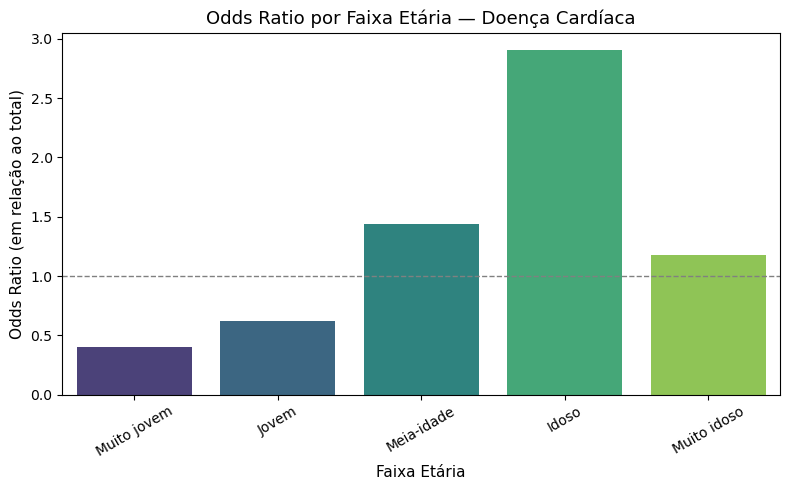

In [27]:
#Gráfico de Odds Ratio por faixa etária
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(
    x=tab_age.index,
    y=tab_age['Odds_Ratio'],
    palette='viridis'
)

plt.title('Odds Ratio por Faixa Etária — Doença Cardíaca', fontsize=13)
plt.ylabel('Odds Ratio (em relação ao total)', fontsize=11)
plt.xlabel('Faixa Etária', fontsize=11)
plt.axhline(1, color='gray', linestyle='--', linewidth=1)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()